# Assignment 1
Impelmentation of AlexNet and VGG16
You will make and run the famous models that participated in the ImageNet Challenge, which was famous for image classification competitions in the past.

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision import transforms

# display images
from torchvision import utils
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


### Dataset
You will use STL10 Dataset which the image size is 3 x 96 x 96

In [2]:
STL10_train_data = datasets.STL10(root='data', split='train', download=True, transform=transforms.ToTensor())
STL10_val_data = datasets.STL10(root='data', split='test', download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


### - DataLodaer for AlexNet

In [17]:
AlexNet_train_transformation = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Resize(227),
                        transforms.RandomHorizontalFlip(),
])

AlexNet_val_transformation = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Resize(227),
])

# apply transforamtion
STL10_train_data.transform = AlexNet_train_transformation
STL10_val_data.transform = AlexNet_val_transformation

# create DataLoader
train_dl = DataLoader(STL10_train_data, batch_size=32, shuffle=True)
val_dl = DataLoader(STL10_val_data, batch_size=32, shuffle=True)

### - DataLoader for VGG16

In [3]:
VGG16_train_transformation = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Resize(224),
                        transforms.RandomHorizontalFlip(),
])

VGG16_val_transformation = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Resize(224),
])

# apply transforamtion
STL10_train_data.transform = VGG16_train_transformation
STL10_val_data.transform = VGG16_val_transformation

# create DataLoader
train_dl = DataLoader(STL10_train_data, batch_size=32, shuffle=True)
val_dl = DataLoader(STL10_val_data, batch_size=32, shuffle=True)

### Check DataLoader and Image size 

In [4]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    print('labels.shape:', labels.shape)
    break

images.shape: torch.Size([32, 3, 224, 224])
labels.shape: torch.Size([32])


image indices: [ 235 3980  905 2763]


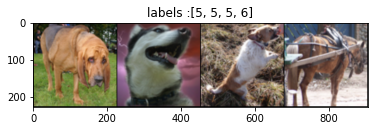

In [5]:
# display sample images 
def show(img, y=None, color=True):
    npimg = img.numpy()
    npimg_tr = np.transpose(npimg, (1,2,0))
    plt.imshow(npimg_tr)

    if y is not None:
        plt.title('labels :' + str(y))

np.random.seed(1)
torch.manual_seed(1)

grid_size = 4
rnd_inds = np.random.randint(0, len(STL10_train_data), grid_size)
print('image indices:',rnd_inds)

x_grid = [STL10_train_data[i][0] for i in rnd_inds]
y_grid = [STL10_train_data[i][1] for i in rnd_inds]

x_grid = utils.make_grid(x_grid, nrow=grid_size, padding=2)

show(x_grid, y_grid)

## 1. AlexNet
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99FEB93C5C80B5192E)
![](https://wikidocs.net/images/page/137251/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA_2021-08-07_%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB_5.36.28.png)

In [23]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            #########################################################################
            # TODO:                                                                #
            # Implement AlexNet architecture.                                      #
            #########################################################################
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(# TODO, # TODO),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(# TODO, # TODO),
            nn.ReLU(inplace=True),
            nn.Linear(# TODO, # TODO),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

model = AlexNet().to(device)

## 2. VGG16
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FK990l%2FbtqwDJ7C54R%2F664Ksm6gyTGBR1wK3YPDFk%2Fimg.png)
![](https://wikidocs.net/images/page/137251/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA_2021-08-07_%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB_5.36.28.png)

In [29]:
class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()
        self.features = nn.Sequential(
            #########################################################################
            # TODO:                                                                #
            # Implement VGG16 architecture.                                        #
            #########################################################################
        )
        self.classifier = nn.Sequential(
            nn.Linear(# TODO, # TODO),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(# TODO, # TODO),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(# TODO, # TODO),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 512 * 7 * 7)
        x = self.classifier(x)
        return x

model = VGG16().to(device)

## 3. Train

In [30]:
# configs
epochs = 10
learning_rate = 1e-3

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# train
def train_one_epoch(model, optimizer, data_loader, device):
    model.train()
    one_epoch_loss = 0
    for x, y in data_loader:
        x = x.to(device)
        y = y.to(device)

        pred = model(x)
        loss = criterion(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        one_epoch_loss += loss.item()
    return one_epoch_loss / len(data_loader)

def eval_one_epoch(model, data_loader, device):
    model.eval()
    one_epoch_loss = 0
    correct = 0
    with torch.no_grad():
        for x, y in data_loader:
            x = x.to(device)
            y = y.to(device)

            pred = model(x)
            loss = criterion(pred, y)

            one_epoch_loss += loss.item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    return one_epoch_loss / len(data_loader), correct / len(data_loader.dataset)

def train():
    for epoch in range(epochs):
        train_loss = train_one_epoch(model, optimizer, train_dl, device)
        print(f'Epoch {epoch+1} / {epochs}')
        print(f'Train Loss: {train_loss:.4f}')
        eval_loss, correct = eval_one_epoch(model, val_dl, device)
        print(f'Eval Loss: {eval_loss:.4f}, Eval Acc: {100 * correct:.4f}%')
train()